In [1]:
# showing plots for data from 3/18/25
# the sweeping data was collected with 1 source meter, collecting I_DS and I_GS
# this data was DMSO-based antibody functionalization on b4d1 and b4d2
# the time series data was done only using 1 channel
# the timeseries was done with 0.01X PBS and 0.1X PBS
# the funcionalization was done using PEG-NH2 and ETA as quenchers


In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit

In [3]:
# filenames

# filenames for functionalization
filenames_1_func = ['data/data_25-03-18/b4d1a-id.csv', 
                 'data/data_25-03-18/b4d1a-pbase.csv', 
                 'data/data_25-03-18/b4d1a-ab.csv',
                 'data/data_25-03-18/b4d1a-peg.csv',
                 'data/data_25-03-18/b4d1a-eta.csv',]

filenames_2_func = ['data/data_25-03-18/b4d1d-id.csv', 
                 'data/data_25-03-18/b4d1d-pbase(blank).csv', 
                 'data/data_25-03-18/b4d1d-ab(blank).csv',
                 'data/data_25-03-18/b4d1d-peg(blank).csv',
                 'data/data_25-03-18/b4d1d-eta(blank).csv',]

filenames_3_func = ['data/data_25-03-18/b4d2c-id.csv', 
                 'data/data_25-03-18/b4d2c-pbase.csv', 
                 'data/data_25-03-18/b4d2c-ab.csv',
                 'data/data_25-03-18/b4d2c-peg.csv',
                 'data/data_25-03-18/b4d2c-eta.csv',]

filenames_4_func = ['data/data_25-03-18/b4d2d-id.csv', 
                 'data/data_25-03-18/b4d2d-pbase(blank).csv', 
                 'data/data_25-03-18/b4d2d-ab(blank).csv',
                 'data/data_25-03-18/b4d2d-peg(blank).csv',
                 'data/data_25-03-18/b4d2d-eta(blank).csv',]


In [35]:
def load_csv_data_1ch(filenames):
    '''
    for multiple file
    works for cases where time sweeps have different number of samples 
    '''
    data_list = []
    for filename in filenames:
        data_device = np.genfromtxt(filename, delimiter=',', skip_header=1, filling_values=np.nan).T[[6, 4], :]
        data_device = np.nan_to_num(data_device)
        data_device[1,:] *= 1000.0
        num_time_samples = data_device.shape[-1]
        data_list.append(data_device[:,-1*num_time_samples*1//3:][:, ::-1]) # 2/3 here because right bound dipped below dirac current
        # print(data_list[-1].shape)
        # plt.plot(data_list[-1][1,:])
    # list of elements of shape (voltages/currents), voltage_sweep, 
    # index is device_num
    # plt.show()
    # plt.close()
    
    return data_list



def get_dirac_points(IV_list):
    dirac_ivs_list = []
    for IV_mx in IV_list:
        dirac_idx = np.argmin(IV_mx[1])
        dirac_iv = IV_mx[:,dirac_idx]
        dirac_ivs_list.append(dirac_iv)
    return np.array(dirac_ivs_list)


print(1)
data_1 = load_csv_data_1ch(filenames_1_func)
data_1_dirac = get_dirac_points(data_1)
print(2)
data_2_blank = load_csv_data_1ch(filenames_2_func)
data_2_blank_dirac = get_dirac_points(data_2_blank)
print(3)
data_3 = load_csv_data_1ch(filenames_3_func)
data_3_dirac = get_dirac_points(data_3)
print(4)
data_4_blank = load_csv_data_1ch(filenames_4_func)
data_4_blank_dirac = get_dirac_points(data_4_blank)

print(len(data_1), data_1[0].shape, data_1_dirac.shape)
print(len(data_2_blank), data_2_blank[0].shape, data_2_blank_dirac.shape)
print(len(data_3), data_3[0].shape, data_3_dirac.shape)
print(len(data_4_blank), data_4_blank[0].shape, data_4_blank_dirac.shape)


1
2
3
4
5 (2, 134) (5, 2)
5 (2, 134) (5, 2)
5 (2, 134) (5, 2)
5 (2, 134) (5, 2)


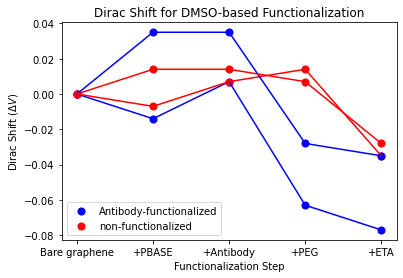

In [36]:
def plot_func_steps(dirac_mx_func_list, dirac_mx_func_blank_list, title):

    xlabels = ['Bare graphene', '+PBASE', '+Antibody', '+PEG', '+ETA']
    labels = ['Antibody-functionalized', 'non-functionalized']
    colors = ['blue', 'red', 'orange']
    for dev_num in range(len(dirac_mx_func_list)):
        plt.scatter(range(dirac_mx_func_list[dev_num][:,0].size), dirac_mx_func_list[dev_num][:,0] - dirac_mx_func_list[dev_num][0,0], s=50, color=colors[0], label=labels[0])
        plt.plot(range(dirac_mx_func_list[dev_num][:,0].size), dirac_mx_func_list[dev_num][:,0] - dirac_mx_func_list[dev_num][0,0], color=colors[0], label=labels[0])

        plt.scatter(range(dirac_mx_func_blank_list[dev_num][:,0].size), dirac_mx_func_blank_list[dev_num][:,0] - dirac_mx_func_blank_list[dev_num][0,0], s=50, color=colors[1], label=labels[1])
        plt.plot(range(dirac_mx_func_blank_list[dev_num][:,0].size), dirac_mx_func_blank_list[dev_num][:,0] - dirac_mx_func_blank_list[dev_num][0,0], color=colors[1], label=labels[1])

    handles, labels = plt.gca().get_legend_handles_labels()
    unique = {}
    for handle, label in zip(handles, labels):
        if label not in unique:
            unique[label] = handle
    # sorted_unique = dict(sorted(unique.items(), key=lambda x: x[0]))
    # plt.legend(sorted_unique.values(), sorted_unique.keys())
    plt.legend(unique.values(), unique.keys())

    plt.xlabel('Functionalization Step')
    plt.ylabel(rf'Dirac Shift $(\Delta V)$')
    plt.title(title)
    plt.xticks(range(len(xlabels)), xlabels)
    plt.show()
    plt.close()

plot_func_steps([data_1_dirac, data_3_dirac], [data_2_blank_dirac, data_4_blank_dirac], 'Dirac Shift for DMSO-based Functionalization')

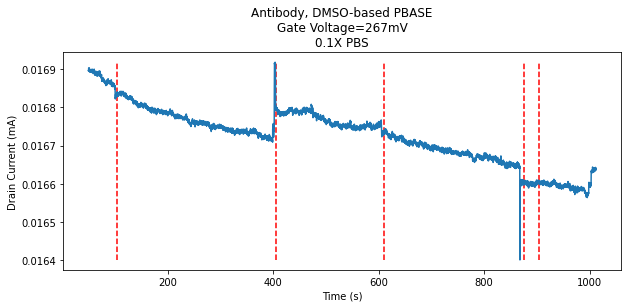

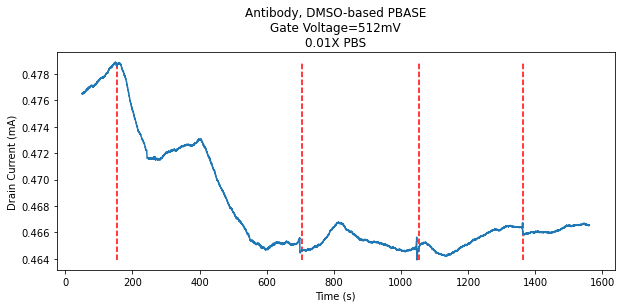

In [46]:
def plot_time_series_1ch(file_path, max_time_sample, min_time_sample=0, xval_action_list=[], title=''):
    data_timesweep = np.genfromtxt(file_path, delimiter=",", dtype=np.float64, filling_values=np.nan)
    data_timesweep = data_timesweep[1+min_time_sample:max_time_sample,[4,3]].T
    
    data_timesweep[1,:] *= 1000.0
    
    plt.figure(figsize=(10, 4))
    
    minim = np.min(data_timesweep[1])
    maxim = np.max(data_timesweep[1])
    for xval in xval_action_list:
        plt.plot([xval+min_time_sample//100, xval+min_time_sample//100], [minim, maxim], color='r', linestyle='--')
    
    plt.plot(data_timesweep[0], data_timesweep[1])
    plt.xlabel('Time (s)')
    plt.ylabel('Drain Current (mA)')
    plt.title(title)
    plt.show()
    plt.close()


file_path = 'data/data_25-03-18/b4d1a-ant-timeseries.csv'
max_time_sample = 10118
# min_time_sample = 300
xval_action_list = [100, 400, 605, 870, 900]
title = 'Antibody, DMSO-based PBASE\nGate Voltage=267mV\n0.1X PBS'
plot_time_series_1ch(file_path=file_path, 
                     max_time_sample=max_time_sample, 
                     min_time_sample=min_time_sample,
                     xval_action_list=xval_action_list, 
                     title=title)

file_path = 'data/data_25-03-18/b4d2c-ant-timeseries.csv'
max_time_sample = 15617
# min_time_sample = 300
xval_action_list = [150, 700, 1050, 1360]
title = 'Antibody, DMSO-based PBASE\nGate Voltage=512mV\n0.01X PBS'
plot_time_series_1ch(file_path=file_path, 
                     max_time_sample=max_time_sample, 
                     min_time_sample=min_time_sample,
                     xval_action_list=xval_action_list, 
                     title=title)
